# Naïve Bayes
- Naïve Bayes is a classification algorithm based on Bayes' theorem, which is a probabilistic approach to classification
- The algorithm assumes that the features used to describe an instance are conditionally independent, given the class label
- Despite its simplistic assumption of feature independence, Naïve Bayes has been found to be surprisingly effective in various real-world applications

## Dataset

In [1]:
# Sklearn datasets are included as part of the scikit-learn (sklearn) library, so they come pre-installed with the library. 
# Due to this, we can easily access and load these datasets, without having to download them separately.

from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

# The load_digits function is used to load a well-known dataset called the "digits dataset". 
# This dataset consists of 8x8 pixel images of handwritten digits (0 through 9)
# It is commonly used for practicing classification algorithms
digits = load_digits()

In [2]:
# Display the digits data
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
# Create a DataFrame from the dataset
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)

# Add the 'target' column to the DataFrame
digits_df['target'] = digits.target

digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [4]:
# Retrieve the dimensions (number of rows and columns) 
digits_df.shape

(1797, 65)

In [5]:
# Assess the structure of the DataFrame and identifying potential issues such as missing values
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [6]:
# Obtain a statistical summary of the numerical columns in a Pandas DataFrame digits_df while excluding the last (target) column
digits_df.iloc[:,:-1].describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [7]:
# Count the number of missing (null) values in each column of the Pandas DataFrame digits_df
digits_df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

## Modelling

In [8]:
# Import two specific classes, GaussianNB and MultinomialNB, from the scikit-learn library's naive_bayes module
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Import the train_test_split function from the sklearn.model_selection module 
# The train_test_split function is used to split a dataset into training and testing subsets
from sklearn.model_selection import train_test_split

In [9]:
# new variable X is created to store the feature variables for your machine learning model
X = digits_df.drop('target', axis=1)

# A new variable y is created to store the target variable (class labels) for your machine learning model
y = digits_df['target']

In [10]:
# Display X
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
# Display y
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [12]:
# n_features: This variable is assigned the number of features in our dataset. 
# n_classes: This variable is assigned an array containing the unique classes or labels found in our target variable y.
n_features, n_classes = X.shape[1], np.unique(y)

n_features, n_classes

(64, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

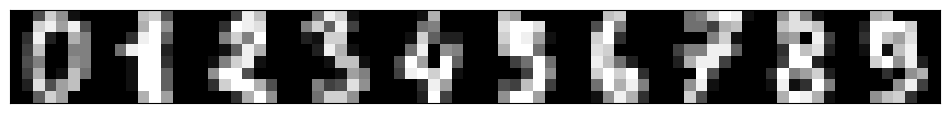

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plt.imshow(np.hstack(X.values[:10].reshape(10,8,8)), cmap="gray")
plt.xticks([], []);
plt.yticks([], []);

In [14]:
# train_test_split is used to split features X and target variable y into training and testing sets
# test_size parameter specifies the proportion of the data allocated for the testing set, which is set to 20% in this case.
# X_train: This variable contains the feature data for the training set.
# X_test: This variable contains the feature data for the testing set.
# y_train: This variable contains the target labels for the training set.
# y_test: This variable contains the target labels for the testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


### GaussianNB

In [15]:
# Use scikit-learn's Gaussian Naïve Bayes classifier to train a model on a training dataset
gau_nb = GaussianNB()
gau_nb.fit(X_train, y_train)

GaussianNB()

In [16]:
# Calculate and print the accuracy of the GaussianNB classifier model on the training set
print("Accuracy on training set: {:.3f}".format(gau_nb.score(X_train, y_train)))

# Calculate and print the accuracy of the GaussianNB classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(gau_nb.score(X_test, y_test)))

Accuracy on training set: 0.837
Accuracy on test set: 0.811


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# The GaussianNB classifier model is used to make predictions on the feature data from the testing dataset (X_test)
y_pred_gau = gau_nb.predict(X_test)
print("Accuracy score: {:.3f}".format(accuracy_score(y_test, y_pred_gau)))

print()

# Calculate the confusion matrix based on the actual target labels (y_test) and the predicted labels (y_pred_gau)
print("Confusion matrix:")
cm_gau = confusion_matrix(y_test, y_pred_gau)
print(cm_gau)

print()

# Generate a text report showing the main classification metrics for a classification model. 
# The metrics usually include precision, recall, F1-score, and support for each class.
print("Classification report:")
print(classification_report(y_test, y_pred_gau))

Accuracy score: 0.811

Confusion matrix:
[[33  0  0  0  1  1  0  0  1  0]
 [ 0 29  1  0  0  0  1  0  3  2]
 [ 0  3 19  0  0  0  0  0 13  0]
 [ 0  0  1 26  0  0  0  1  8  1]
 [ 0  2  0  0 26  0  1  6  1  0]
 [ 0  0  0  0  0 35  0  1  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  4  1  0  0  0  0  1 29  0]
 [ 0  3  1  0  0  0  0  4  3 25]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.69      0.81      0.74        36
           2       0.83      0.54      0.66        35
           3       1.00      0.70      0.83        37
           4       0.96      0.72      0.83        36
           5       0.95      0.95      0.95        37
           6       0.95      0.97      0.96        36
           7       0.73      0.97      0.83        36
           8       0.50      0.83      0.62        35
           9       0.86      0.69      0.77        36

    accu

### Generate seaborn heatmap for the confusion matrix

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

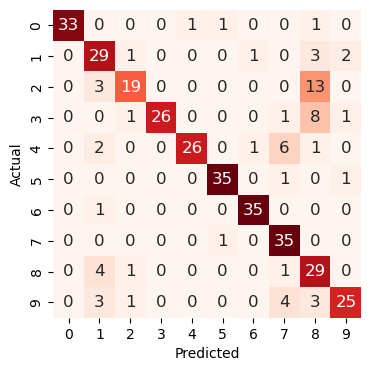

In [19]:
# Creates a Pandas DataFrame df_cm_gau to store the values of the confusion matrix
# data: This is the confusion matrix data calculated in the previous step
# columns=np.unique(y_test): This sets the column labels of the DataFrame
# index=np.unique(y_test): This sets the row labels of the DataFrame
df_cm_gau = pd.DataFrame(cm_gau, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm_gau.index.name = 'Actual'
df_cm_gau.columns.name = 'Predicted'

# Create a new figure for the heatmap 
plt.figure(figsize = (4,4))

# Generate the heatmap visualization
# df_cm_gau: This is the Pandas DataFrame containing the confusion matrix data
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# annot_kws={"size": 12}: This parameter sets the font size for the annotations to 12
# cbar=False: This parameter indicates that a color bar (legend) should not be displayed on the heatmap.
# square=True: This parameter ensures that the heatmap cells are square
# fmt="d": This parameter specifies that the cell values should be formatted as integers
# cmap="Reds": This parameter sets the color map to "Reds".
sb.heatmap(df_cm_gau, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()

### MultinomialNB

In [20]:
# Use scikit-learn's Multinomial Naïve Bayes classifier to train a model on a training dataset
mul_nb = MultinomialNB()
mul_nb.fit(X_train, y_train)

MultinomialNB()

In [21]:
# Calculate and print the accuracy of the MultinomialNB classifier model on the training set
print("Accuracy on training set {:.3f}".format(mul_nb.score(X_train, y_train)))

# Calculate and print the accuracy of the MultinomialNB classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(mul_nb.score(X_test, y_test)))

Accuracy on training set 0.905
Accuracy on test set: 0.889


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# The MultinomialNB classifier model is used to make predictions on the feature data from the testing dataset (X_test)
y_pred_mul = mul_nb.predict(X_test)
print("Accuracy score: {:.3f}".format(accuracy_score(y_test, y_pred_mul)))

print()

# Calculate the confusion matrix based on the actual target labels (y_test) and the predicted labels (y_pred_mul)
print("Confusion matrix:")
cm_mul = confusion_matrix(y_test, y_pred_mul)
print(cm_mul)

print()

# Generate a text report showing the main classification metrics for a classification model. 
# The metrics usually include precision, recall, F1-score, and support for each class.
print("Classification report:")
print(classification_report(y_test, y_pred_mul))

Accuracy score: 0.889

Confusion matrix:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 23  5  0  0  1  1  0  2  4]
 [ 0  1 33  0  0  0  0  0  1  0]
 [ 0  0  1 36  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 31  0  0  0  5]
 [ 0  1  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  6  0  0  0  0  0  1 28  0]
 [ 0  1  0  1  0  0  0  3  3 28]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.72      0.64      0.68        36
           2       0.85      0.94      0.89        35
           3       0.97      0.97      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.84      0.90        37
           6       0.97      0.94      0.96        36
           7       0.90      1.00      0.95        36
           8       0.80      0.80      0.80        35
           9       0.76      0.78      0.77        36

    accu

### Generate seaborn heatmap for the confusion matrix

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt

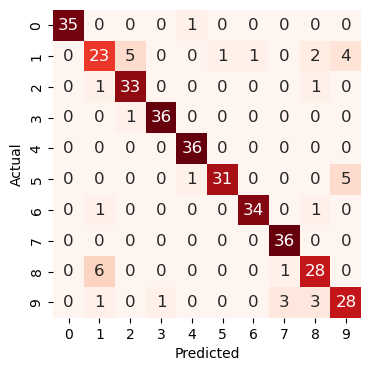

In [24]:
# Creates a Pandas DataFrame df_cm_mul to store the values of the confusion matrix
# data: This is the confusion matrix data calculated in the previous step
# columns=np.unique(y_test): This sets the column labels of the DataFrame
# index=np.unique(y_test): This sets the row labels of the DataFrame
df_cm_mul = pd.DataFrame(cm_mul, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm_mul.index.name = 'Actual'
df_cm_mul.columns.name = 'Predicted'

# Create a new figure for the heatmap 
plt.figure(figsize = (4,4))

# Generate the heatmap visualization
# df_cm_gau: This is the Pandas DataFrame containing the confusion matrix data
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# annot_kws={"size": 12}: This parameter sets the font size for the annotations to 12
# cbar=False: This parameter indicates that a color bar (legend) should not be displayed on the heatmap.
# square=True: This parameter ensures that the heatmap cells are square
# fmt="d": This parameter specifies that the cell values should be formatted as integers
# cmap="Reds": This parameter sets the color map to "Reds".
sb.heatmap(df_cm_mul, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()

### Comparison between GaussianNB and MultinomialNB

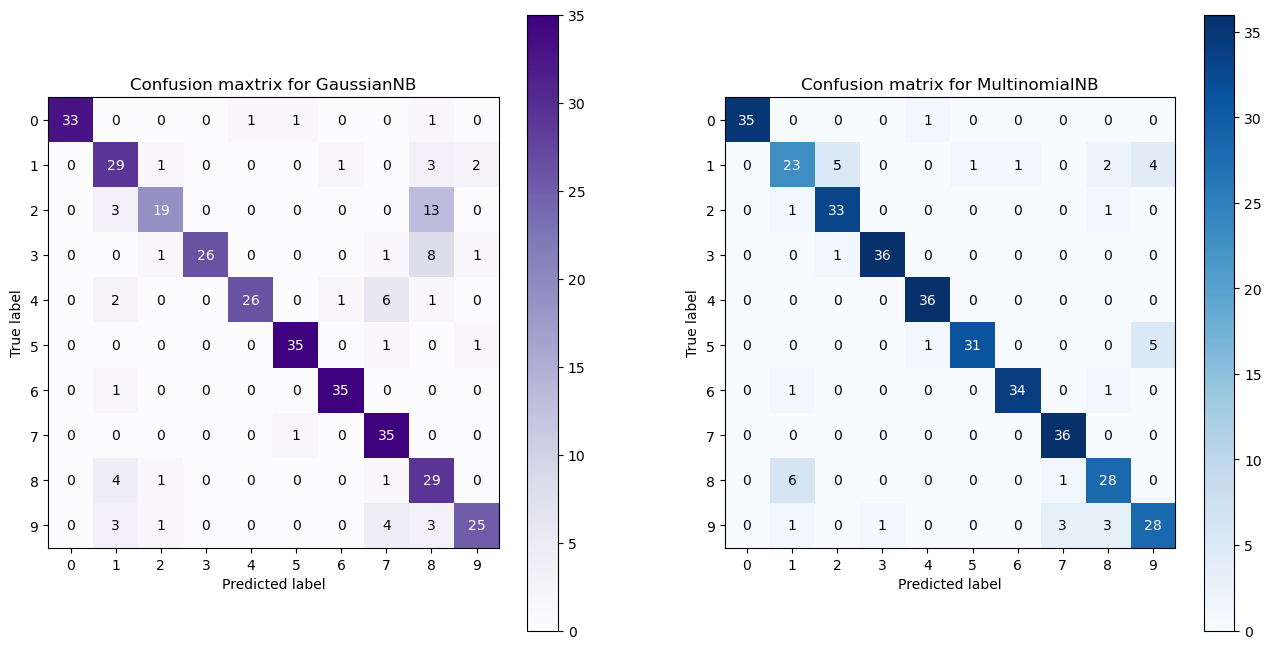

In [25]:
# To install: conda install -c conda-forge scikit-plot
import scikitplot as skplt

fig = plt.figure(figsize=(16,8))

# This creates a subplot (axes) at position 1 in a 1x2 grid (i.e., the first of two subplots).
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_gau,
                                    title="Confusion maxtrix for GaussianNB",
                                    cmap="Purples",
                                    ax=ax1)

# This creates a subplot at position 2 in the 1x2 grid (i.e., the second of two subplots).
ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_mul,
                                    title="Confusion matrix for MultinomialNB",
                                    cmap="Blues",
                                    ax=ax2)

plt.show()